In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split ,GridSearchCV, KFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

In [2]:
from google.colab import files
uploaded = files.upload()

Saving XRD.xlsx to XRD.xlsx


In [3]:
def metrics(model):
  R2_test = r2_score(y_test, model.predict(X_test))
  print("R2 Score(Test): {:.5f}".format(R2_test))
  R2_train = r2_score(y_train, model.predict(X_train))
  print("R2 Score(Train): {:.5f}".format(R2_train))
  mse_test = mean_squared_error(y_test, model.predict(X_test))
  print("MSE(Test): {:.5f}".format(mse_test))
  mse_train = mean_squared_error(y_train, model.predict(X_train))
  print("MSE(Train): {:.5f}".format(mse_train))
  mae_test = mean_absolute_error(y_test, model.predict(X_test))
  print("MAE(Test): {:.5f}".format(mae_test))
  mae_train = mean_absolute_error(y_train, model.predict(X_train))
  print("MAE(Train): {:.5f}".format(mae_train))
  rmse_test = np.sqrt(np.mean((y_test - model.predict(X_test)) ** 2))
  print("RMSE(Test): {:.5f}".format(rmse_test))
  rmse_train = np.sqrt(np.mean((y_train - model.predict(X_train)) ** 2))
  print("RMSE(Train): {:.5f}".format(rmse_train))

In [4]:
Paper1 = pd.read_excel('/content/XRD.xlsx',sheet_name='XRD')
X = Paper1.drop('delta(eff)', axis=1)
y = Paper1['delta(eff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [5]:
#VotingRegressor
XGB1 = XGBRegressor(alpha=0.02792, reg_lambda= 0.9345, n_estimators=639, learning_rate=0.04002)
XGB2 = XGBRegressor(alpha=0.0691, reg_lambda=0.4254, n_estimators=574 ,learning_rate= 0.3446)
XGB3 = XGBRegressor(alpha=0.03854, reg_lambda= 0.8201, n_estimators=409, learning_rate=0.03854)
XGB4 = XGBRegressor(alpha=0.03368, reg_lambda= 0.7221, n_estimators=82, learning_rate=0.192)
XGB5 = XGBRegressor(alpha=0.02752, reg_lambda=0.9295, n_estimators=315, learning_rate= 0.04316)

Voting_reg = VotingRegressor(([('XGB1', XGB1), ('XGB2', XGB2), ('XGB3', XGB3),('XGB4', XGB4), ('XGB5', XGB5)]))
Voting_reg.fit(X_train, y_train)
metrics(Voting_reg)

R2 Score(Test): 0.95764
R2 Score(Train): 0.97158
MSE(Test): 0.02138
MSE(Train): 0.01348
MAE(Test): 0.10692
MAE(Train): 0.07077
RMSE(Test): 0.14622
RMSE(Train): 0.11612


In [6]:
#Metrics for each model
models = [XGBRegressor(alpha=0.02792, reg_lambda= 0.9345, n_estimators=639, learning_rate=0.04002),
          XGBRegressor(alpha=0.0691, reg_lambda=0.4254, n_estimators=574 ,learning_rate= 0.3446),
          XGBRegressor(alpha=0.03854, reg_lambda= 0.8201, n_estimators=409, learning_rate=0.03854),
          XGBRegressor(alpha=0.03368, reg_lambda= 0.7221, n_estimators=82, learning_rate=0.192),
          XGBRegressor(alpha=0.02752, reg_lambda=0.9295, n_estimators=315, learning_rate= 0.04316)]

for i, model in enumerate(models):
  model.fit(X_train,y_train)
  print('\033[1m' +f"Model{i+1}:"+'\033[0m')
  metrics(model)

Model1:
R2 Score(Test): 0.95905
R2 Score(Train): 0.96943
MSE(Test): 0.02067
MSE(Train): 0.01450
MAE(Test): 0.10566
MAE(Train): 0.06733
RMSE(Test): 0.14378
RMSE(Train): 0.12042
Model2:
R2 Score(Test): 0.95335
R2 Score(Train): 0.97244
MSE(Test): 0.02355
MSE(Train): 0.01308
MAE(Test): 0.11302
MAE(Train): 0.08312
RMSE(Test): 0.15345
RMSE(Train): 0.11435
Model3:
R2 Score(Test): 0.95299
R2 Score(Train): 0.95698
MSE(Test): 0.02373
MSE(Train): 0.02041
MAE(Test): 0.10290
MAE(Train): 0.08271
RMSE(Test): 0.15404
RMSE(Train): 0.14287
Model4:
R2 Score(Test): 0.95657
R2 Score(Train): 0.98468
MSE(Test): 0.02192
MSE(Train): 0.00727
MAE(Test): 0.12157
MAE(Train): 0.05330
RMSE(Test): 0.14806
RMSE(Train): 0.08526
Model5:
R2 Score(Test): 0.96062
R2 Score(Train): 0.96903
MSE(Test): 0.01988
MSE(Train): 0.01469
MAE(Test): 0.10540
MAE(Train): 0.06749
RMSE(Test): 0.14099
RMSE(Train): 0.12122


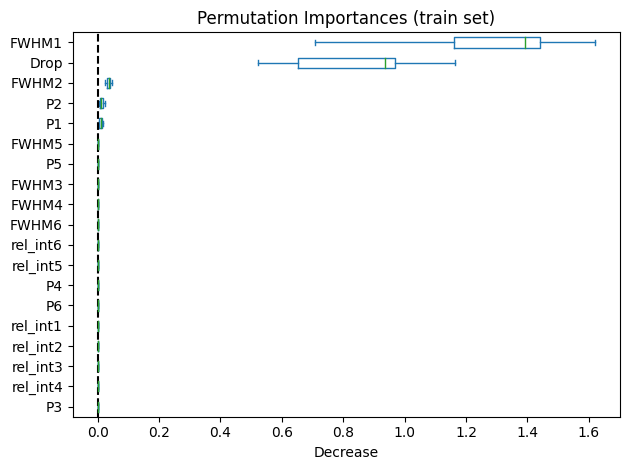

In [7]:
result = permutation_importance(
    model, X_train , y_train , random_state=78, n_jobs=2)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease")
ax.figure.tight_layout()

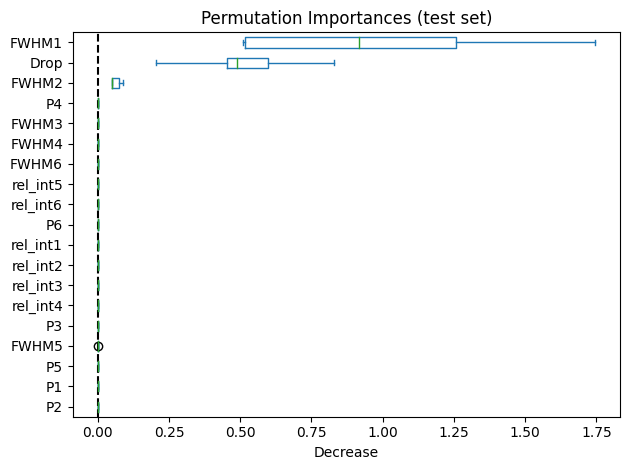

In [8]:
result = permutation_importance(
    model, X_test, y_test , random_state=78, n_jobs=2)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease")
ax.figure.tight_layout()